# **Customer Segmentation and Clustering**

## **Business Understanding**

**Overview**

Customer segmentation is a vital process for businesses aiming to tailor their marketing strategies and improve customer engagement. By dividing a broad customer base into smaller, more manageable groups, companies can better address the specific needs and preferences of each segment, leading to enhanced customer satisfaction and increased sales.

## **Problem Statement:**

The marketing team at the shopping mall wants to better understand the target customer base to design effective marketing strategies. The goal is to identify distinct customer segments based on demographic and behavioral data, such as age, annual income, and spending score. This segmentation will help in tailoring marketing efforts to specific groups, improving customer engagement, and increasing sales.

**Objective:**

The main objective is to segment the shopping mall's target market into approachable groups based on demographic and behavioral criteria. This segmentation aims to enhance the understanding of the customer base, enabling more effective and targeted marketing activities.

**specific Objective**

- Identify Key Customer Segments: Group customers into distinct segments based on their age, annual income, and spending score.

- Label Each Segment: Provide meaningful labels for each identified segment to describe their characteristics.

- Determine the Ideal Number of Groups: Use clustering techniques to determine the optimal number of customer segments.



**Metric of Success**

The success of this project will be measured by:

- Silhouette Score: A higher silhouette score indicates well-defined clusters. It measures how similar a point is to its own cluster compared to other clusters.

- Inertia (Within-cluster sum of squares): Lower inertia values indicate that points within a cluster are closer to each other, signifying more compact clusters.

- Interpretability of Clusters: The clusters should be interpretable and meaningful to the marketing team, allowing them to devise targeted strategies.

- Improvement in Marketing KPIs: Post-implementation, metrics such as customer engagement, conversion rates, and sales should show improvement.

## **Data Understanding**

The dataset consists of 200 entries with 5 columns: CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100). Below is a summary of the data:

- CustomerID: Unique identifier for each customer. It ranges from 1 to 200 and is an integer type.

- Gender: Categorical variable indicating the gender of the customer. It has two unique values: 'Male' and 'Female'.

- Age: Integer variable representing the age of the customer.

- Annual Income (k$): Integer variable representing the annual income of the customer in thousands of dollars.

- Spending Score (1-100): Integer variable representing the spending score assigned to the customer by the shopping mall, on a scale of 1 to 100.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans




In [3]:
mallData = pd.read_csv("./data/Mall_Customers.csv")
mallData.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mallData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
mallData.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
mallData.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **Univariate Analysis**

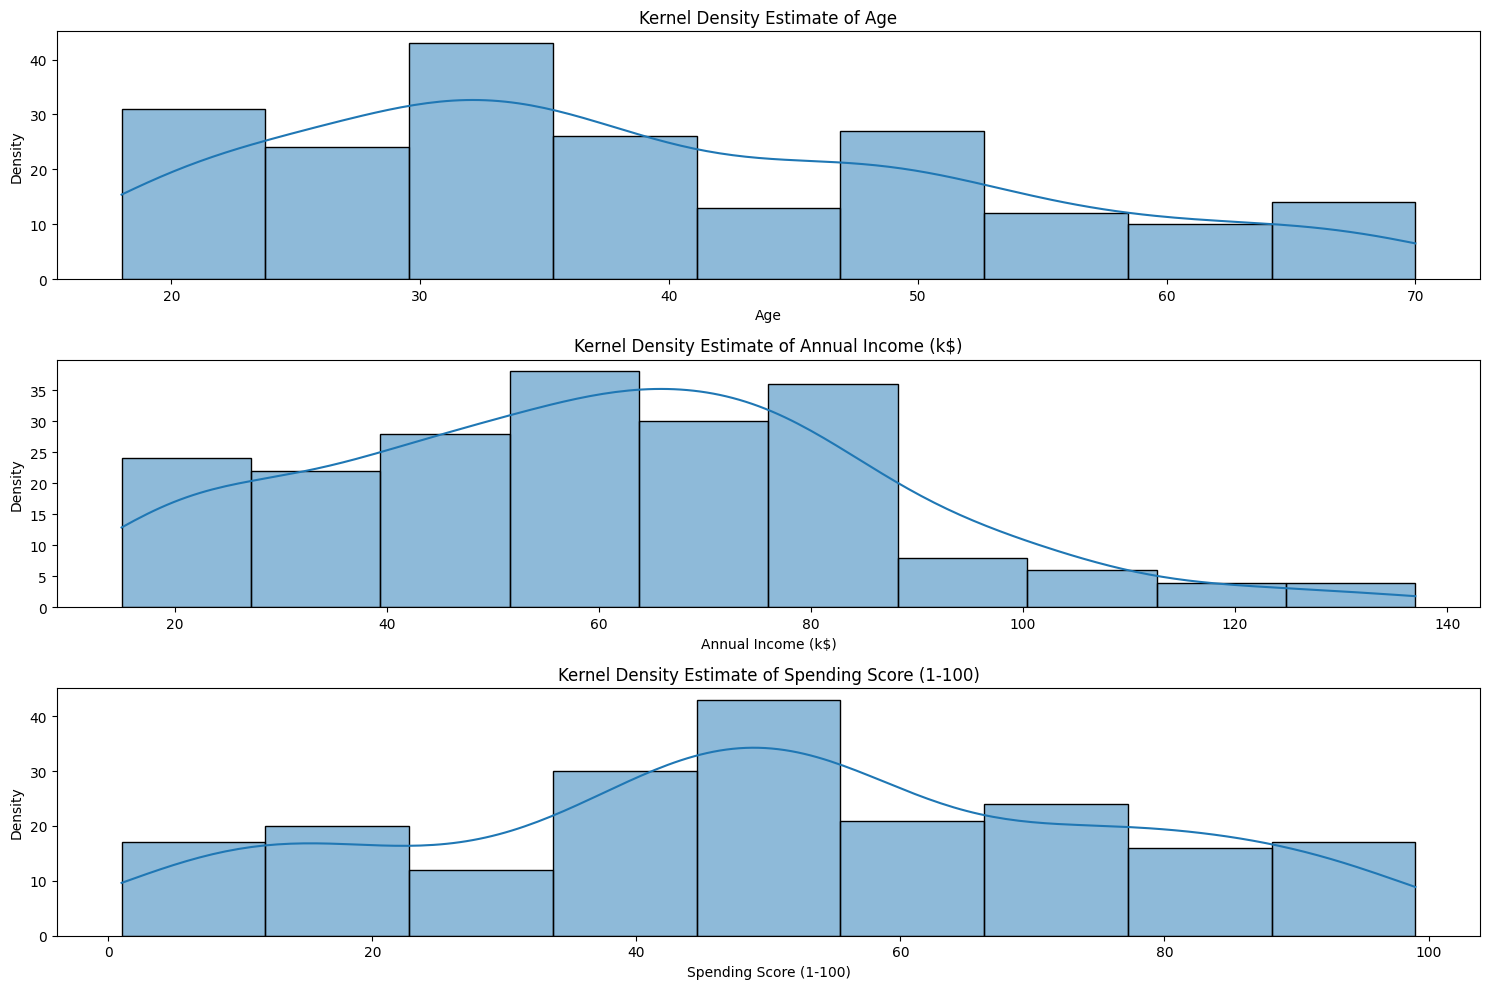

<Figure size 640x480 with 0 Axes>

In [7]:
# Define the columns to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Loop through each column and create a KDE plot
for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    sns.histplot(mallData[col], kde= True)
    plt.title(f'Kernel Density Estimate of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

# Save the plot to a file
plt.savefig("images/kde_plots.png")

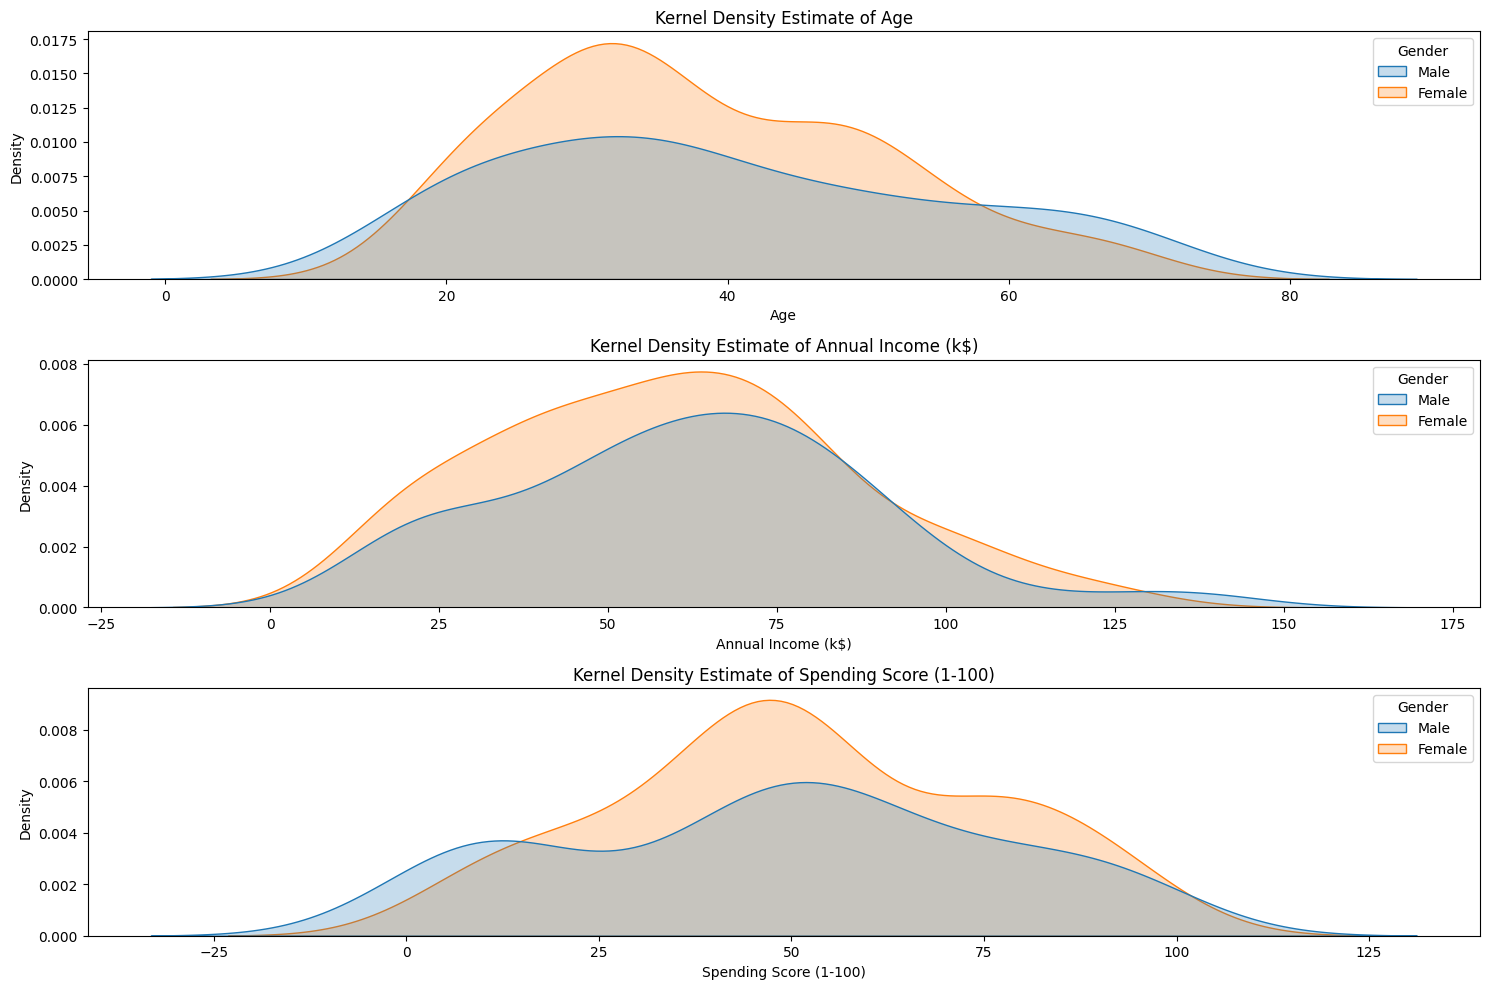

In [8]:
# Ensure no trailing spaces in column names
mallData.columns = mallData.columns.str.strip()

# Define the columns to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Loop through each column and create a KDE plot
for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    sns.kdeplot(data=mallData, x=col, hue='Gender', fill=True)
    plt.title(f'Kernel Density Estimate of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

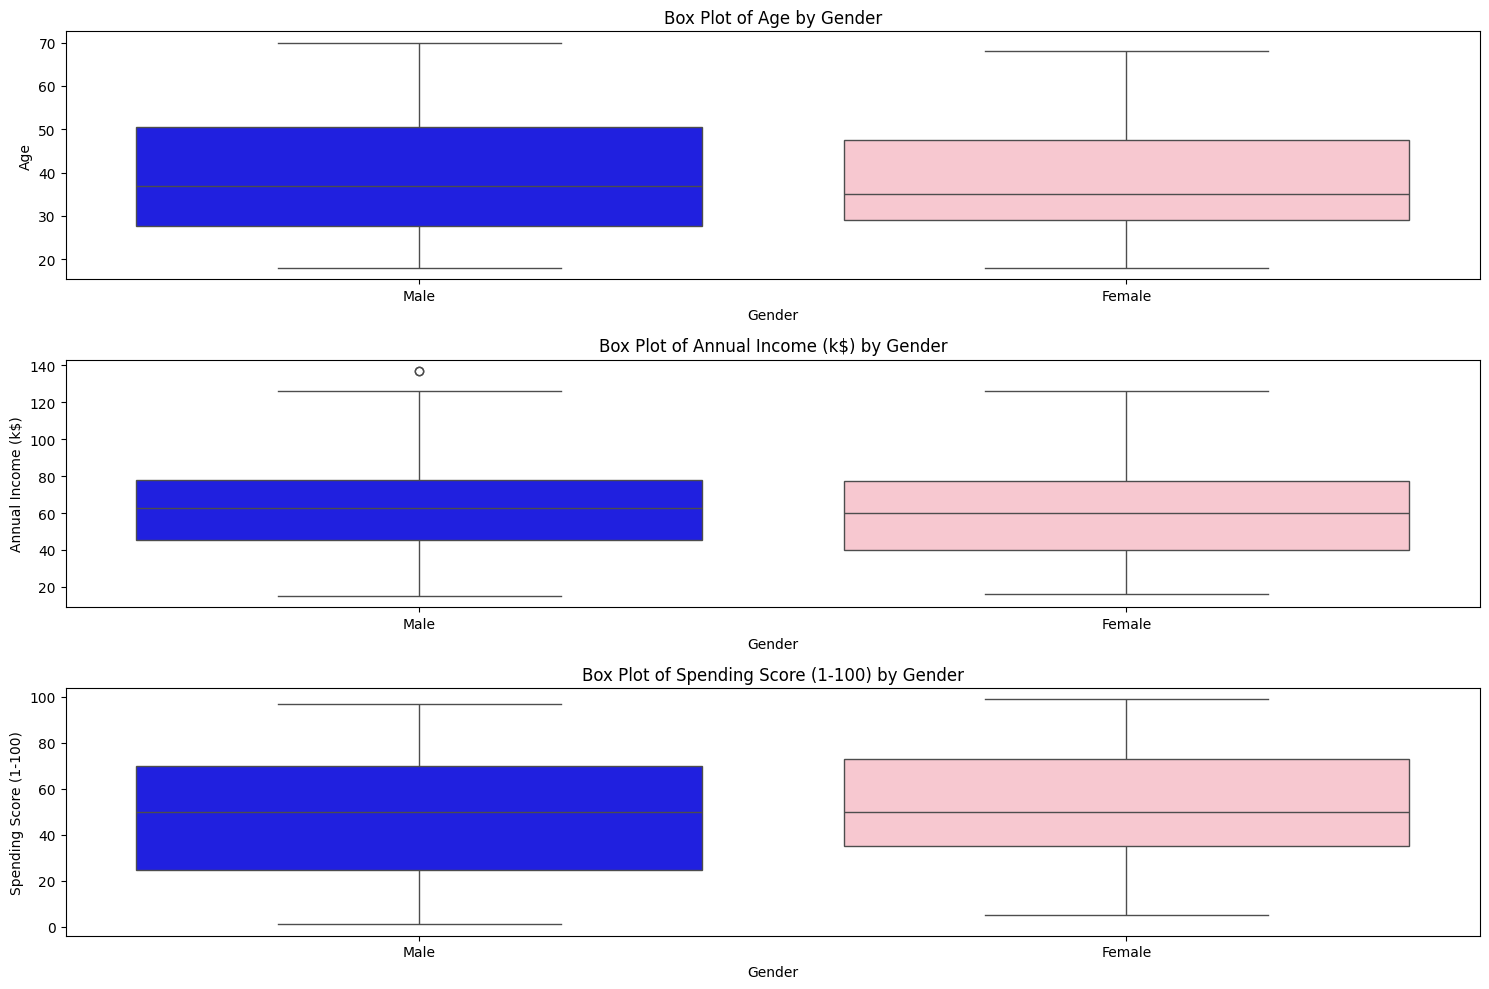

In [9]:
# Ensure no trailing spaces in column names
mallData.columns = mallData.columns.str.strip()

# Define the columns to plot
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Define a custom color palette
palette = {"Male": "blue", "Female": "pink"}

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Loop through each column and create a box plot
for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Gender', y=col, data=mallData, hue='Gender', palette=palette, legend=False)
    plt.title(f'Box Plot of {col} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(col)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

In [10]:
mallData["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

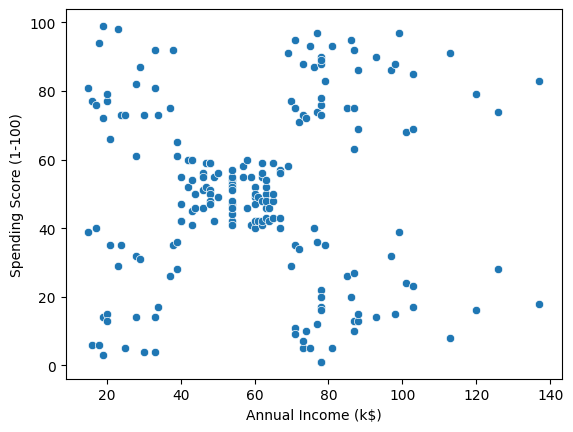

In [11]:
# Assuming 'mallData' is your DataFrame
sns.scatterplot(data=mallData, x='Annual Income (k$)', y='Spending Score (1-100)')

# Show the plot
plt.show()

In [12]:
mallData = mallData.drop("CustomerID", axis= 1)
mallData.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


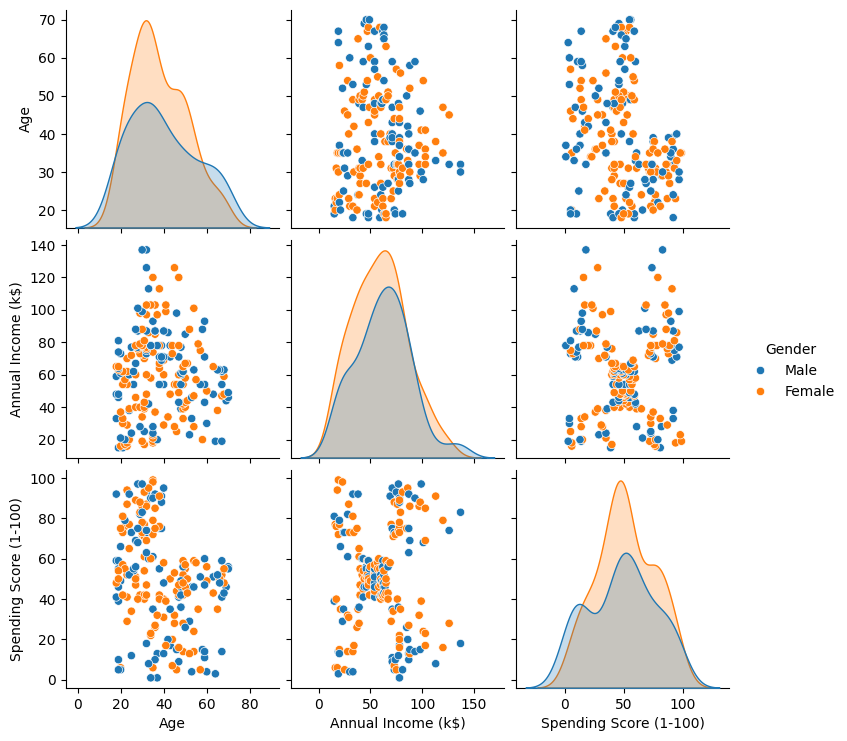

In [13]:
# Creating the pairplot
sns.pairplot(mallData, hue='Gender')

# Show the plot
plt.show()

In [14]:
mallData.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
# Drop non-numeric columns
numeric_data = mallData.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the result
correlation_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


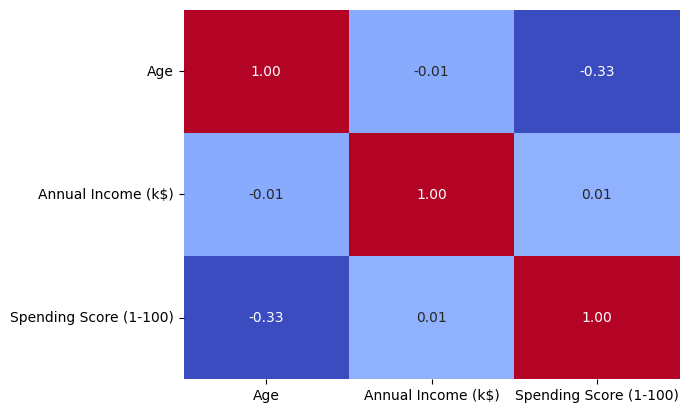

In [16]:
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)

# Show the plot
plt.show()

## **Clustering**

In [17]:
clustering1 = KMeans()
clustering1.fit(mallData[['Annual Income (k$)']])
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3,
       3, 3])

In [19]:
mallData['Income Cluster'] = clustering1.labels_
mallData.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [22]:
mallData['Income Cluster'].value_counts()

Income Cluster
4    42
6    36
2    32
0    28
5    26
1    16
7    14
3     6
Name: count, dtype: int64

In [23]:
clustering1.inertia_

2822.4996947496957